## Case Study on Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset 
car_data = pd.read_csv(r"C:\\Users\\ayshu\\Downloads\\car_age_price.csv")

In [3]:
car_data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
#Checking the shape of the dataframe

car_data.shape

(112, 2)

In [5]:
# check for null values

car_data.isnull().sum()

Year     0
Price    0
dtype: int64

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
car_data.columns

Index(['Year', 'Price'], dtype='object')

In [8]:
import seaborn as sns

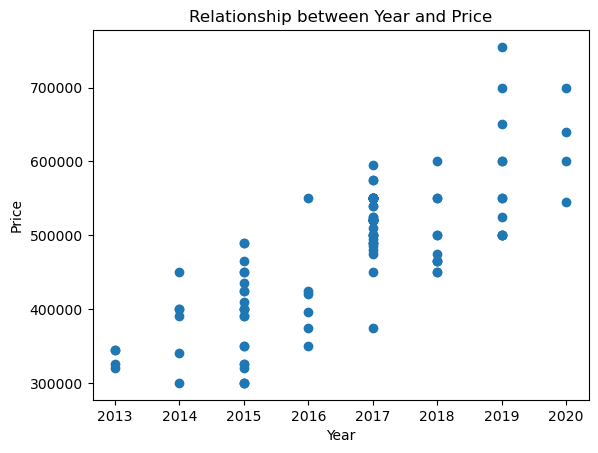

In [9]:
# Visualize the relationship between 'Year' and 'Price'
plt.scatter(car_data['Year'], car_data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Relationship between Year and Price')
plt.show()

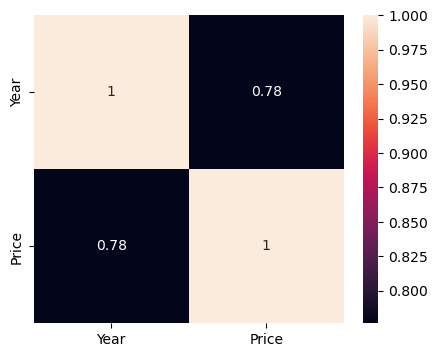

In [10]:
# heatmap

plt.figure(figsize=(5,4))
sns.heatmap(car_data.corr(), annot=True)
plt.show()

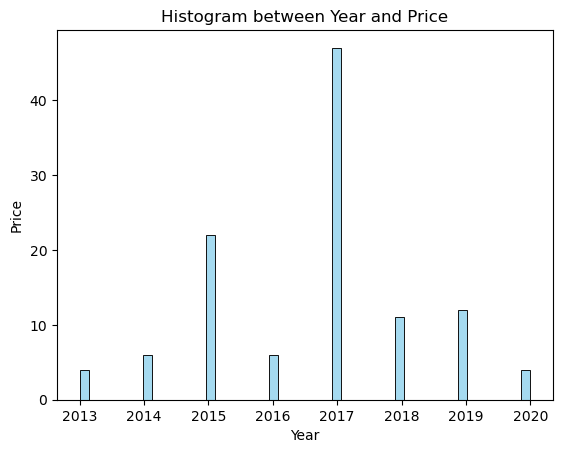

In [11]:
sns.histplot(car_data['Year'], bins=50, kde=False, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Histogram between Year and Price')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Extracting features (Year) and target variable (Price)
X = car_data[['Year']]
y = car_data['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

     Year
66   2017
90   2017
62   2017
22   2015
85   2015
..    ...
106  2015
14   2017
92   2017
51   2018
102  2015

[89 rows x 1 columns]      Year
40   2019
65   2017
4    2018
47   2018
42   2018
69   2015
26   2017
11   2018
10   2019
44   2019
73   2013
55   2017
68   2015
97   2020
0    2018
18   2019
53   2013
80   2015
103  2017
91   2017
36   2017
12   2017
31   2017 66     525000
90     520000
62     540000
22     434999
85     320000
        ...  
106    300000
14     475000
92     520000
51     550000
102    350000
Name: Price, Length: 89, dtype: int64 40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64


In [13]:
# Create and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


# Predicting on the test set
y_pred_linear = linear_reg.predict(X_test)


In [14]:
accuracy_lr = linear_reg.score(X_test, y_test)
print(accuracy_lr)

0.36759313425902185


In [15]:
# Evaluation metrics for Linear Regression
print('Linear Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_linear))
print('R-squared:', r2_score(y_test, y_pred_linear))

Linear Regression Metrics:
Mean Squared Error: 4326906256.829671
R-squared: 0.36759313425902185


In [16]:
from sklearn.tree import DecisionTreeRegressor

dr_model = DecisionTreeRegressor() #Instantiate an object

dr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [17]:
accuracy_dr = dr_model.score(X_test, y_test)
accuracy_dr

0.47397011720817483

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators= 100, max_depth=25) #Instantiate an object

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=25)

In [19]:
accuracy_rf = rf_model.score(X_test, y_test)
accuracy_rf

0.4894243007804655

In [20]:
# Create a DataFrame with the 'Year' feature for prediction
year_2022 = pd.DataFrame({'Year': [2022]})

# Predicting the price of a 2022 model second-hand Grand i10 using Linear Regression
predicted_price_linear = linear_reg.predict(year_2022)
print('Linear Regression Prediction:', predicted_price_linear)

print('Decission Tree :',accuracy_dr )
print('Random forest :', accuracy_rf)

Linear Regression Prediction: [743601.61594504]
Decission Tree : 0.47397011720817483
Random forest : 0.4894243007804655
